In [2]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata - Sheet1.csv to CocaCola_Sales_Rawdata - Sheet1.csv


In [4]:
import pandas as pd

file =  pd.read_csv('CocaCola_Sales_Rawdata - Sheet1.csv')
file.head()

,Quarter,Sales
0,Q1_86,1734.827
1,Q2_86,2244.961
2,Q3_86,2533.805
3,Q4_86,2154.963
4,Q1_87,1547.819


<Axes: >

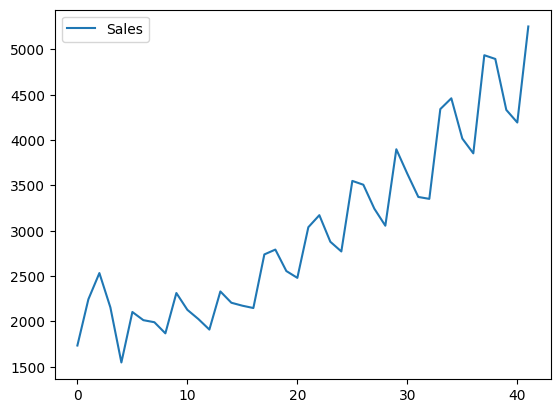

In [5]:
# line plot
file.plot()

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

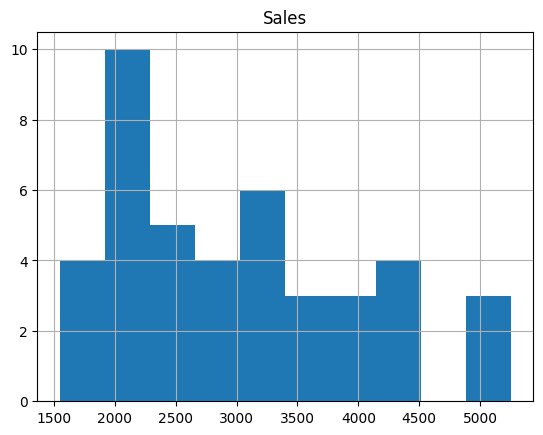

In [6]:
file.hist()

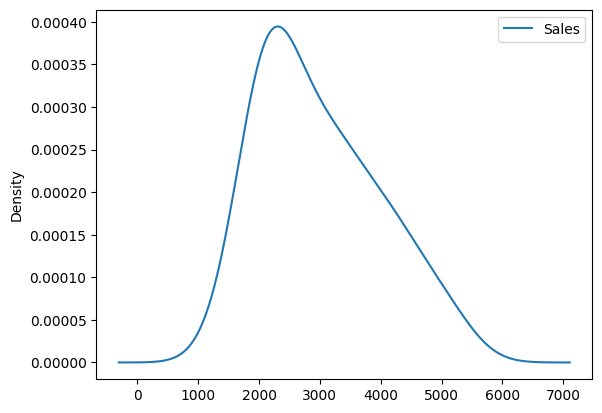

In [7]:
from matplotlib import pyplot
file.plot(kind='kde')
pyplot.show()

<Axes: >

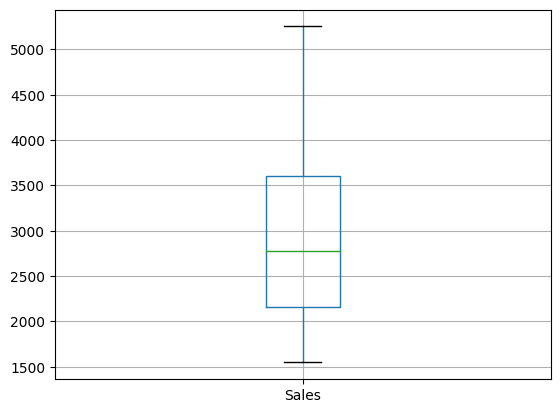

In [8]:
file.boxplot()

RMSE: 377.31311488282824


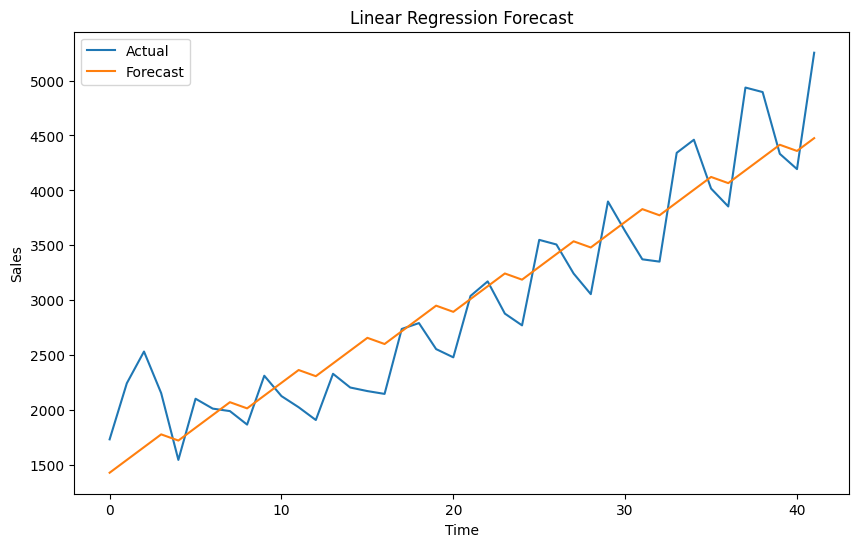

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Data
data = {
    'Quarter': ['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
    'Sales': [1734.827, 2244.960999, 2533.804993, 2154.962997, 1547.818996, 2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996, 2128.32, 2026.828999, 1910.603996, 2331.164993, 2206.549995, 2173.967995, 2148.278, 2739.307999, 2792.753998, 2556.009995, 2480.973999, 3039.522995, 3172.115997, 2879.000999, 2772, 3550, 3508, 3243.859993, 3056, 3899, 3629, 3373, 3352, 4342, 4461, 4017, 3854, 4936, 4895, 4333, 4194, 5253]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Extract year and quarter from 'Quarter' column
df['Year'] = df['Quarter'].apply(lambda x: int(x.split('_')[1][:2]))
df['Quarter'] = df['Quarter'].apply(lambda x: int(x.split('_')[0][1:]))

# Create the linear regression model
X = sm.add_constant(df[['Year', 'Quarter']])
y = df['Sales']
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, predictions))
print("RMSE:", rmse)

# Plot the data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(df.index, predictions, label='Forecast')
plt.title('Linear Regression Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


RMSE: 324.59328083565373


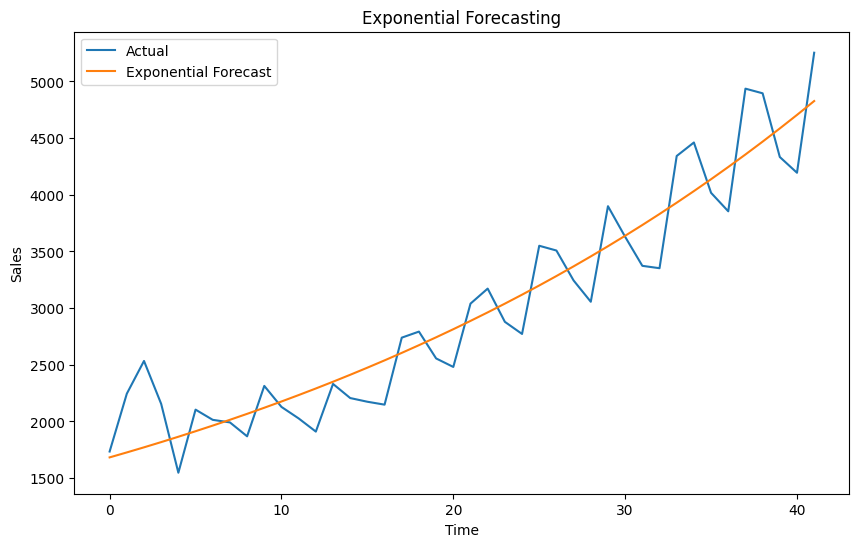

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Data
data = {
    'Quarter': ['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
    'Sales': [1734.827, 2244.960999, 2533.804993, 2154.962997, 1547.818996, 2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996, 2128.32, 2026.828999, 1910.603996, 2331.164993, 2206.549995, 2173.967995, 2148.278, 2739.307999, 2792.753998, 2556.009995, 2480.973999, 3039.522995, 3172.115997, 2879.000999, 2772, 3550, 3508, 3243.859993, 3056, 3899, 3629, 3373, 3352, 4342, 4461, 4017, 3854, 4936, 4895, 4333, 4194, 5253]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Extract year and quarter from 'Quarter' column
df['Year'] = df['Quarter'].apply(lambda x: int(x.split('_')[1][:2]))
df['Quarter'] = df['Quarter'].apply(lambda x: int(x.split('_')[0][1:]))

# Exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential curve
params, _ = curve_fit(exponential_func, range(len(df)), df['Sales'])

# Generate forecasts
forecast_values = exponential_func(range(len(df)), *params)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['Sales'], forecast_values))
print("RMSE:", rmse)

# Plot the data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(df.index, forecast_values, label='Exponential Forecast')
plt.title('Exponential Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


RMSE: 305.08234822632653


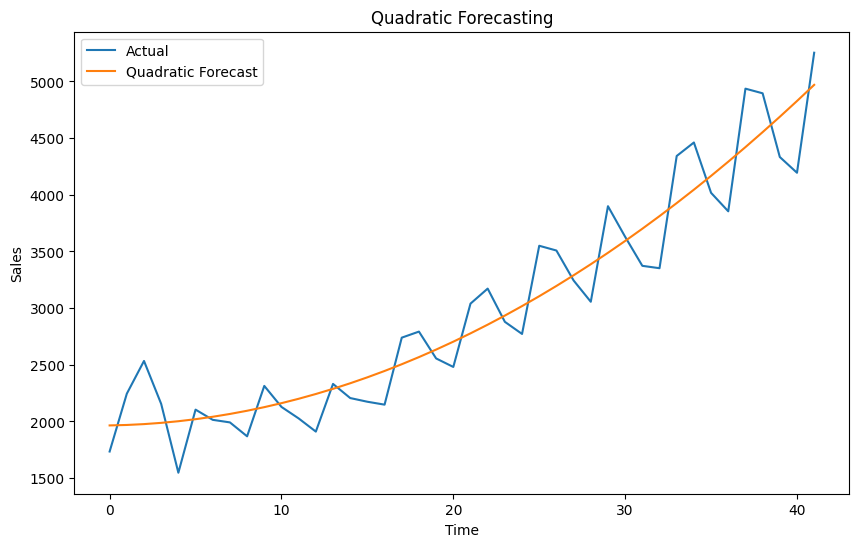

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


data = {
    'Quarter': ['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
    'Sales': [1734.827, 2244.960999, 2533.804993, 2154.962997, 1547.818996, 2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996, 2128.32, 2026.828999, 1910.603996, 2331.164993, 2206.549995, 2173.967995, 2148.278, 2739.307999, 2792.753998, 2556.009995, 2480.973999, 3039.522995, 3172.115997, 2879.000999, 2772, 3550, 3508, 3243.859993, 3056, 3899, 3629, 3373, 3352, 4342, 4461, 4017, 3854, 4936, 4895, 4333, 4194, 5253]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Extract year and quarter from 'Quarter' column
df['Year'] = df['Quarter'].apply(lambda x: int(x.split('_')[1][:2]))
df['Quarter'] = df['Quarter'].apply(lambda x: int(x.split('_')[0][1:]))

# Quadratic function
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic curve
params, _ = curve_fit(quadratic_func, np.arange(len(df)), df['Sales'])

# Generate forecasts
forecast_values = quadratic_func(np.arange(len(df)), *params)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['Sales'], forecast_values))
print("RMSE:", rmse)

# Plot the data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(df.index, forecast_values, label='Quadratic Forecast')
plt.title('Quadratic Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [32]:
import pandas as pd


df = pd.DataFrame(data)

# Extract year and quarter from 'Quarter' column
df['Year'] = df['Quarter'].str.split('_').str[1]
df['Quarter'] = df['Quarter'].str.split('_').str[0]

# Combine year and quarter to form a PeriodIndex
df['Period'] = pd.PeriodIndex(df['Year'] + df['Quarter'], freq='Q')

# Set 'Period' as the index
df.set_index('Period', inplace=True)

# Drop 'Year' column (if needed)
df.drop(columns=['Year'], inplace=True)

print(df)


       Quarter     Sales
Period                  
2086Q1      Q1  1734.827
2086Q2      Q2  2244.961
2086Q3      Q3  2533.805
2086Q4      Q4  2154.963
2087Q1      Q1  1547.819
2087Q2      Q2  2104.412
